In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Adjust path if needed
df = pd.read_csv("/content/AB_NYC_2019.csv")
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.info()
df.isnull().sum()   # See missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
#Cleaning data
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)


In [ ]:
df.drop(columns=['last_review'], inplace=True)


In [ ]:
df.dropna(subset=['name', 'host_name'], inplace=True)


In [ ]:
text_cols = ['neighbourhood_group', 'neighbourhood', 'room_type']
for col in text_cols:
    df[col] = df[col].str.strip().str.lower()


In [ ]:
# Keep only listings with reasonable prices
df = df[df['price'] < 1000]

# Keep only listings with realistic availability (0-365 days)
df = df[df['availability_365'] <= 365]


In [ ]:
df['estimated_reviews_per_year'] = df['reviews_per_month'] * 12


In [ ]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 48560 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48560 non-null  int64  
 1   name                            48560 non-null  object 
 2   host_id                         48560 non-null  int64  
 3   host_name                       48560 non-null  object 
 4   neighbourhood_group             48560 non-null  object 
 5   neighbourhood                   48560 non-null  object 
 6   latitude                        48560 non-null  float64
 7   longitude                       48560 non-null  float64
 8   room_type                       48560 non-null  object 
 9   price                           48560 non-null  int64  
 10  minimum_nights                  48560 non-null  int64  
 11  number_of_reviews               48560 non-null  int64  
 12  reviews_per_month               48560

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


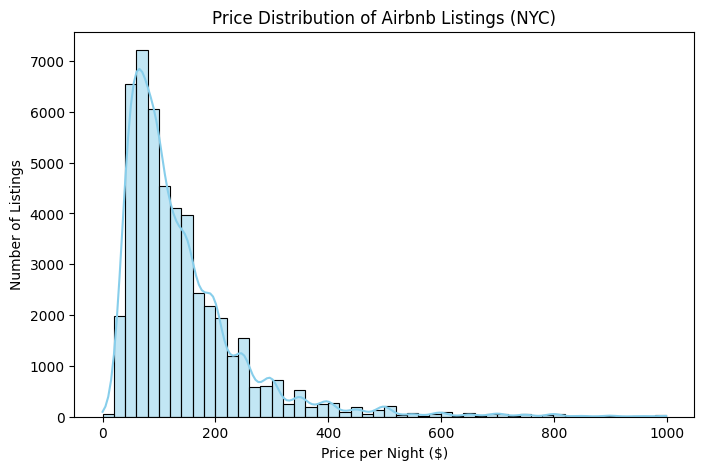

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True, color='skyblue')
plt.title("Price Distribution of Airbnb Listings (NYC)")
plt.xlabel("Price per Night ($)")
plt.ylabel("Number of Listings")
plt.show()


/tmp/ipython-input-25-4258948369.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='neighbourhood_group', y='price', estimator='mean', ci=None, palette='coolwarm')
/tmp/ipython-input-25-4258948369.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='neighbourhood_group', y='price', estimator='mean', ci=None, palette='coolwarm')


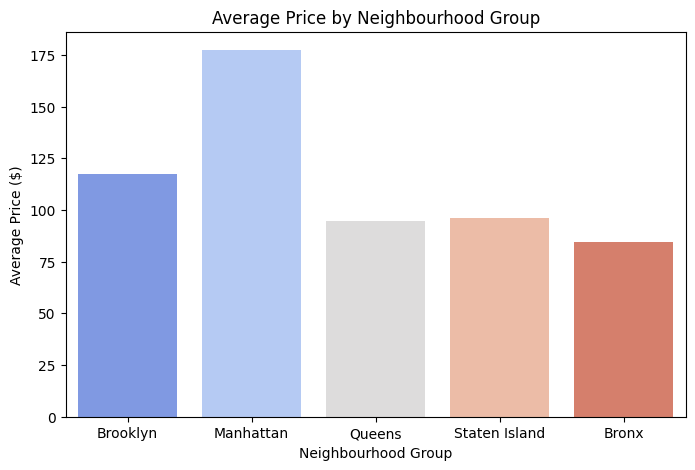

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='neighbourhood_group', y='price', estimator='mean', ci=None, palette='coolwarm')
plt.title("Average Price by Neighbourhood Group")
plt.ylabel("Average Price ($)")
plt.xlabel("Neighbourhood Group")
plt.show()


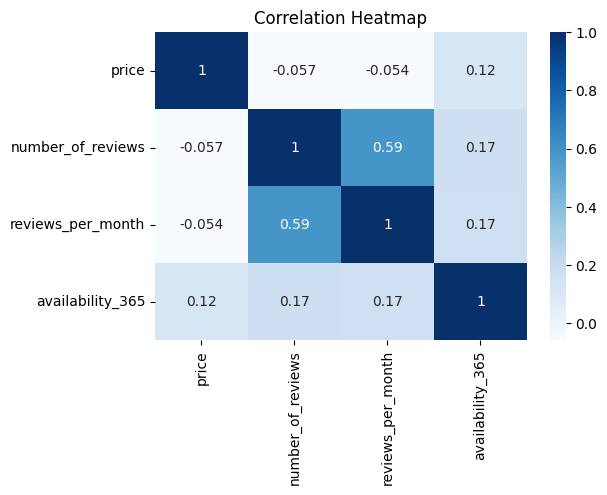

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['price','number_of_reviews','reviews_per_month','availability_365']].corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()


/tmp/ipython-input-27-3610583354.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neighbourhoods.values, y=top_neighbourhoods.index, palette='magma')


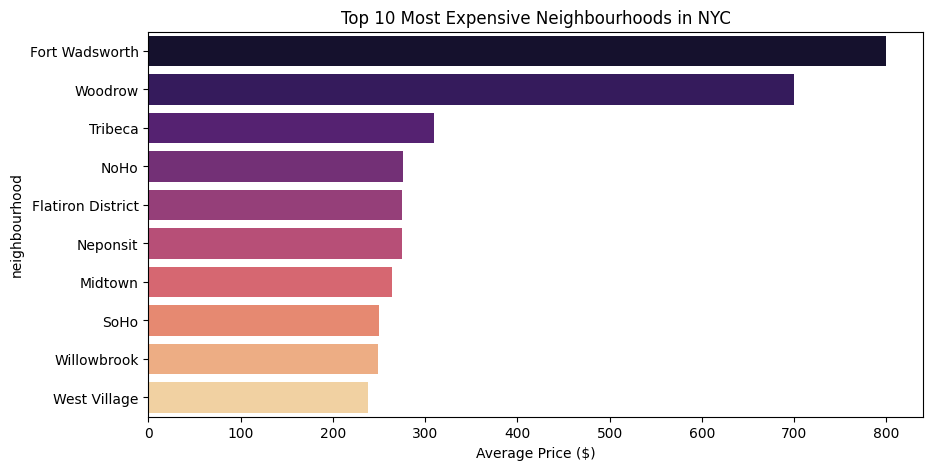

In [ ]:
#Top 10 Most Expensive Neighbourhoods
top_neighbourhoods = (
    df.groupby('neighbourhood')['price']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(x=top_neighbourhoods.values, y=top_neighbourhoods.index, palette='magma')
plt.title("Top 10 Most Expensive Neighbourhoods in NYC")
plt.xlabel("Average Price ($)")
plt.show()


/tmp/ipython-input-28-910149644.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hosts.values, y=top_hosts.index, palette='cool')


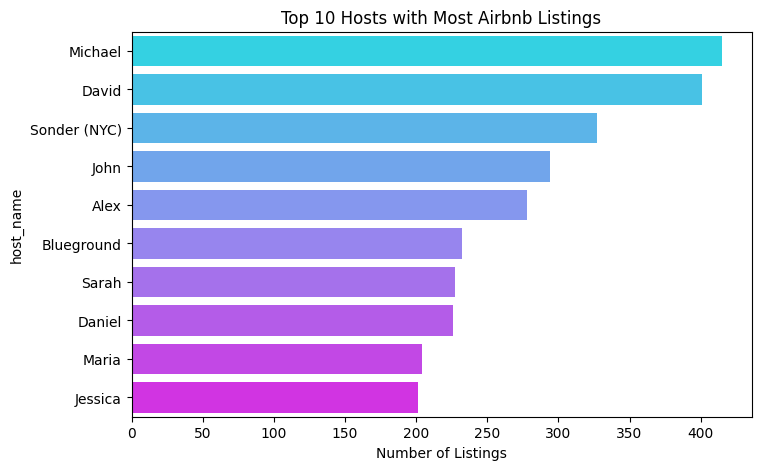

In [ ]:
top_hosts = (
    df['host_name']
    .value_counts()
    .head(10)
)

plt.figure(figsize=(8,5))
sns.barplot(x=top_hosts.values, y=top_hosts.index, palette='cool')
plt.title("Top 10 Hosts with Most Airbnb Listings")
plt.xlabel("Number of Listings")
plt.show()


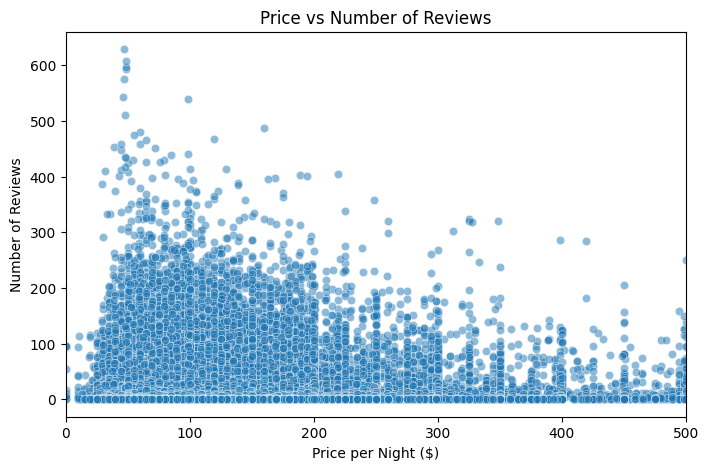

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='price', y='number_of_reviews', alpha=0.5)
plt.title("Price vs Number of Reviews")
plt.xlabel("Price per Night ($)")
plt.ylabel("Number of Reviews")
plt.xlim(0,500)  # Limit x-axis to remove extreme outliers
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd

# Select useful columns
features = ['room_type', 'neighbourhood_group', 'minimum_nights',
            'number_of_reviews', 'reviews_per_month', 'availability_365']
target = 'price'

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df[features], drop_first=True)

# X = features, y = target
X = df_encoded
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))


R2 Score: 0.31408173327176536
Mean Absolute Error: 56.910458766727906


In [ ]:
# Select features for prediction
features = ['room_type', 'neighbourhood_group', 'minimum_nights',
            'number_of_reviews', 'reviews_per_month', 'availability_365']
target = 'price'

# One-hot encode categorical variables (room_type, neighbourhood_group)
df_encoded = pd.get_dummies(df[features], drop_first=True)

# X = features, y = price
X = df_encoded
y = df['price']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))


R² Score: 0.31408173327176536
Mean Absolute Error: 56.910458766727906


In [ ]:
# Get the exact feature names used during training
feature_names = X_train.columns

# Create a blank row with all 0s
sample_listing = pd.DataFrame(columns=feature_names)
sample_listing.loc[0] = 0

# Fill only the actual values you want
sample_listing['minimum_nights'] = 3
sample_listing['number_of_reviews'] = 50
sample_listing['reviews_per_month'] = 2.0
sample_listing['availability_365'] = 180

# Encode the chosen room_type & neighbourhood_group
sample_listing['room_type_Private room'] = 0
sample_listing['room_type_Shared room'] = 0
sample_listing['neighbourhood_group_Manhattan'] = 1

# Predict
predicted_price = model.predict(sample_listing)
print("Predicted Price per Night: $", round(predicted_price[0], 2))


Predicted Price per Night: $ 222.26


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred_rf))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf))


R² Score: 0.32769160649256646
Mean Absolute Error: 56.246721714079165


<Axes: title={'center': 'Feature Importance'}>

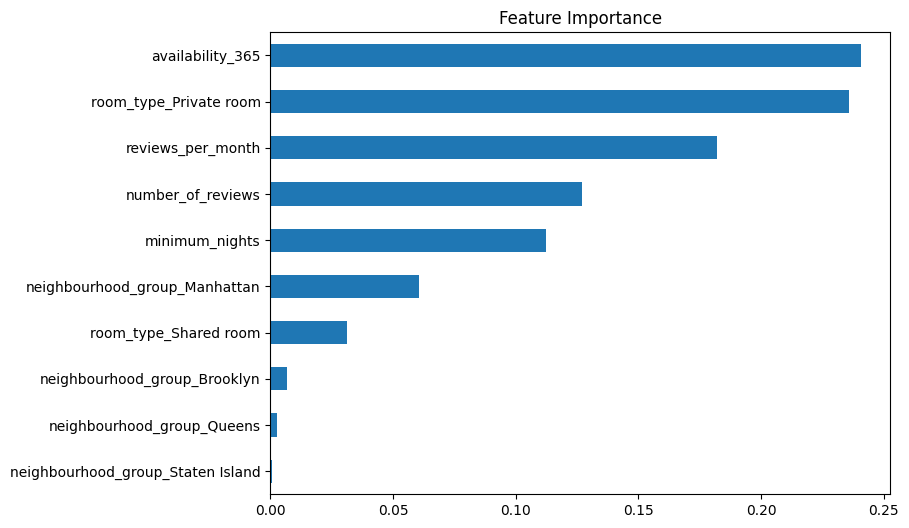

In [ ]:
import numpy as np

feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importance.sort_values(ascending=True).plot(kind='barh', figsize=(8,6), title="Feature Importance")


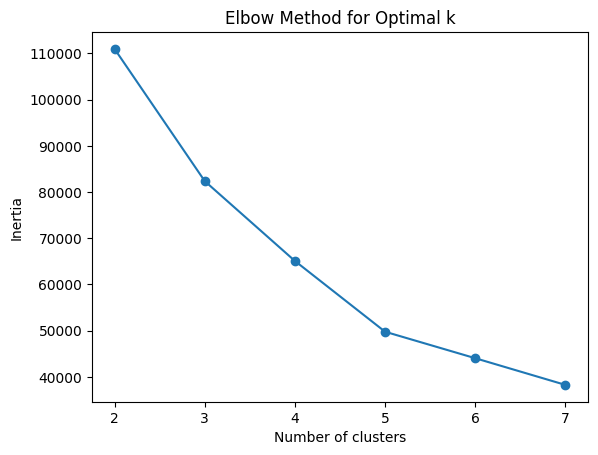

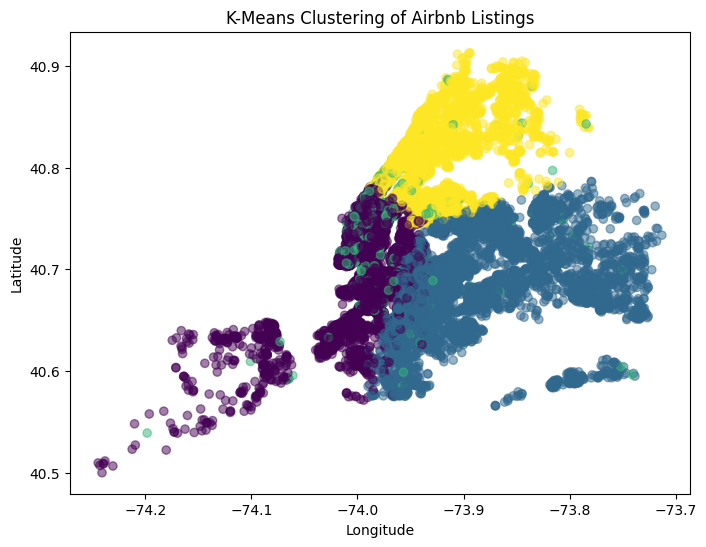

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Use only numeric features for clustering
cluster_data = df[['price', 'latitude', 'longitude']]

# Scale the data (important for k-means)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Find optimal number of clusters using Elbow Method
inertia = []
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

plt.plot(range(2,8), inertia, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# Suppose optimal k=4
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

# Visualize clusters
plt.figure(figsize=(8,6))
plt.scatter(df['longitude'], df['latitude'], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("K-Means Clustering of Airbnb Listings")
plt.show()


In [ ]:
!pip install dask

import dask.dataframe as dd

# Load same Airbnb dataset as a Dask dataframe
ddf = dd.read_csv("/content/AB_NYC_2019.csv")
print(ddf.head())  # Works lazily
print(ddf.describe().compute())  # Compute only when needed


     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [ ]:
!pip install streamlit

import streamlit as st
import joblib

st.title("Airbnb Price Predictor")

room_type = st.selectbox("Room Type", ["Entire home/apt", "Private room", "Shared room"])
neighbourhood_group = st.selectbox("Neighbourhood Group", ["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island"])
minimum_nights = st.slider("Minimum Nights", 1, 30, 3)
availability_365 = st.slider("Availability (days/year)", 0, 365, 180)

if st.button("Predict Price"):
    # Prepare input just like training
    # predict_price = model.predict(...)
    st.write(f"Predicted Price: $XXX")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.5 MB/s eta 0:00:00


2025-07-22 14:58:02.694 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 14:58:02.894 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-22 14:58:02.898 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 14:58:02.899 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 14:58:02.901 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 14:58:02.903 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 14:58:02.904 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 14:58:02.905 Thread 'MainThread': mi

In [ ]:
import joblib

# Save the trained model
joblib.dump(model, "airbnb_price_model.pkl")

# Also save the list of columns used during training
joblib.dump(X_train.columns.tolist(), "airbnb_features.pkl")




['airbnb_features.pkl']

In [ ]:
import streamlit as st
import pandas as pd
import joblib

# Load model & feature columns
model = joblib.load("airbnb_price_model.pkl")
feature_cols = joblib.load("airbnb_features.pkl")

st.title("🏡 Airbnb Price Predictor")

st.write("Predict the estimated price per night for an Airbnb listing.")

# ---- User Inputs ----
room_type = st.selectbox("Room Type", ["Entire home/apt", "Private room", "Shared room"])
neighbourhood_group = st.selectbox(
    "Neighbourhood Group", ["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island"]
)
minimum_nights = st.slider("Minimum Nights", 1, 30, 3)
number_of_reviews = st.slider("Number of Reviews", 0, 500, 50)
reviews_per_month = st.slider("Reviews per Month", 0.0, 10.0, 2.0)
availability_365 = st.slider("Availability (days per year)", 0, 365, 180)

# ---- Create Input DataFrame ----
input_data = pd.DataFrame(columns=feature_cols)
input_data.loc[0] = 0  # Fill all with 0 first

# Fill numeric values
input_data["minimum_nights"] = minimum_nights
input_data["number_of_reviews"] = number_of_reviews
input_data["reviews_per_month"] = reviews_per_month
input_data["availability_365"] = availability_365

# Set one-hot encoding for selected options
if f"room_type_{room_type}" in input_data.columns:
    input_data[f"room_type_{room_type}"] = 1

if f"neighbourhood_group_{neighbourhood_group}" in input_data.columns:
    input_data[f"neighbourhood_group_{neighbourhood_group}"] = 1

# ---- Predict ----
if st.button("Predict Price"):
    predicted_price = model.predict(input_data)[0]
    st.success(f"Estimated Price per Night: **${round(predicted_price, 2)}**")


2025-07-22 15:01:10.976 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 15:01:10.977 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 15:01:10.978 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 15:01:10.979 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 15:01:10.980 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 15:01:10.981 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 15:01:10.982 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-22 15:01:10.983 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar